In [113]:
import os
import csv
import numpy as np
import scipy as sp
from scipy import ndimage

from PIL import Image

In [49]:
arq = open('ballons.pgm')
formato = arq.readline()
formato

'P2\n'

In [50]:
col, lin = arq.readline().split()
col = int(col)
lin = int(lin)
lin, col

(480, 640)

In [51]:
pixel_max = eval(arq.readline())
pixel_max

255

In [52]:
dados = arq.read().split()
dados[0]

'163'

In [4]:
dados[1]

'640'

In [5]:
dados[2]

'480'

In [6]:
dados[3]

'255'

In [7]:
dados[4]

'163'

In [8]:
dados[5]

'166'

In [67]:
npdados = np.array(dados, dtype = 'int').reshape((lin, col))

In [68]:
npdados

array([[163, 166, 146, ...,  76, 209, 180],
       [214,  61, 205, ..., 211, 209, 222],
       [150, 147, 101, ..., 212, 210, 221],
       ...,
       [  9,  10, 151, ...,  65, 133,  38],
       [183,  10,  11, ..., 108,   0, 110],
       [ 10,  34, 151, ...,  37,  90,  67]])

In [69]:
limiar = pixel_max/2
limiar

127.5

In [70]:
for i in range(lin):
    for j in range(col):
        if (npdados[i][j] <= limiar):
            npdados[i][j] = 0
        else:
            npdados[i][j] = 255

In [71]:
npdados

array([[255, 255, 255, ...,   0, 255, 255],
       [255,   0, 255, ..., 255, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       ...,
       [  0,   0, 255, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]])

In [96]:
arqSaida = open('saida.pgm', 'w')

In [97]:
arqSaida.write(formato)

3

In [98]:
arqSaida.write(str(col)+' '+str(lin)+'\n')

8

In [99]:
arqSaida.write(str(pixel_max)+'\n')

4

In [100]:
help(np.savetxt)

Help on function savetxt in module numpy.lib.npyio:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : 1D or 2D array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
            a) a single specifier, `fmt='%.4e'`, resulting in numbers formatted
               like `' (%s+%sj)' % (fmt, fmt)`
            b) a full string specifying every real and imaginary part, e.g.
               `' %.

In [102]:
np.savetxt(arqSaida, npdados, delimiter = ' ', newline = '\n', fmt = '%3.0f')

In [103]:
!cat saida.pgm | head

P2
640 480
255
255 255 255 255 255 255 255   0   0 255   0 255   0 255 255 255 255 255   0   0 255   0 255 255 255   0 255 255 255   0   0 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255   0 255 255   0 255 255 255 255 255   0 255 255   0   0   0   0 255   0 255 255   0   0   0   0   0 255   0 255 255 255 255   0   0   0   0   0   0 255   0   0   0 255 255 255   0 255   0 255   0   0   0 255   0   0   0   0   0   0   0   0 255   0   0   0   0 255   0 255   0   0   0   0   0 255   0   0 255   0   0 255   0   0   0   0   0   0   0   0   0 255   0 255 255   0   0 255   0 255   0   0 255 255   0   0   0 255 255   0   0   0 255   0   0   0   0   0 255   0   0   0   0 255   0 255   0 255   0 255   0   0 255 255   0 255   0 255   0   0   0 255 255   0 255   0   0 255   0   0   0   0   0   0   0   0 255   0   0 255   0   0   0   0   0   0 255   0   0   0   0 255 255   0   0 255   0 255   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [94]:
arqSaida.close()

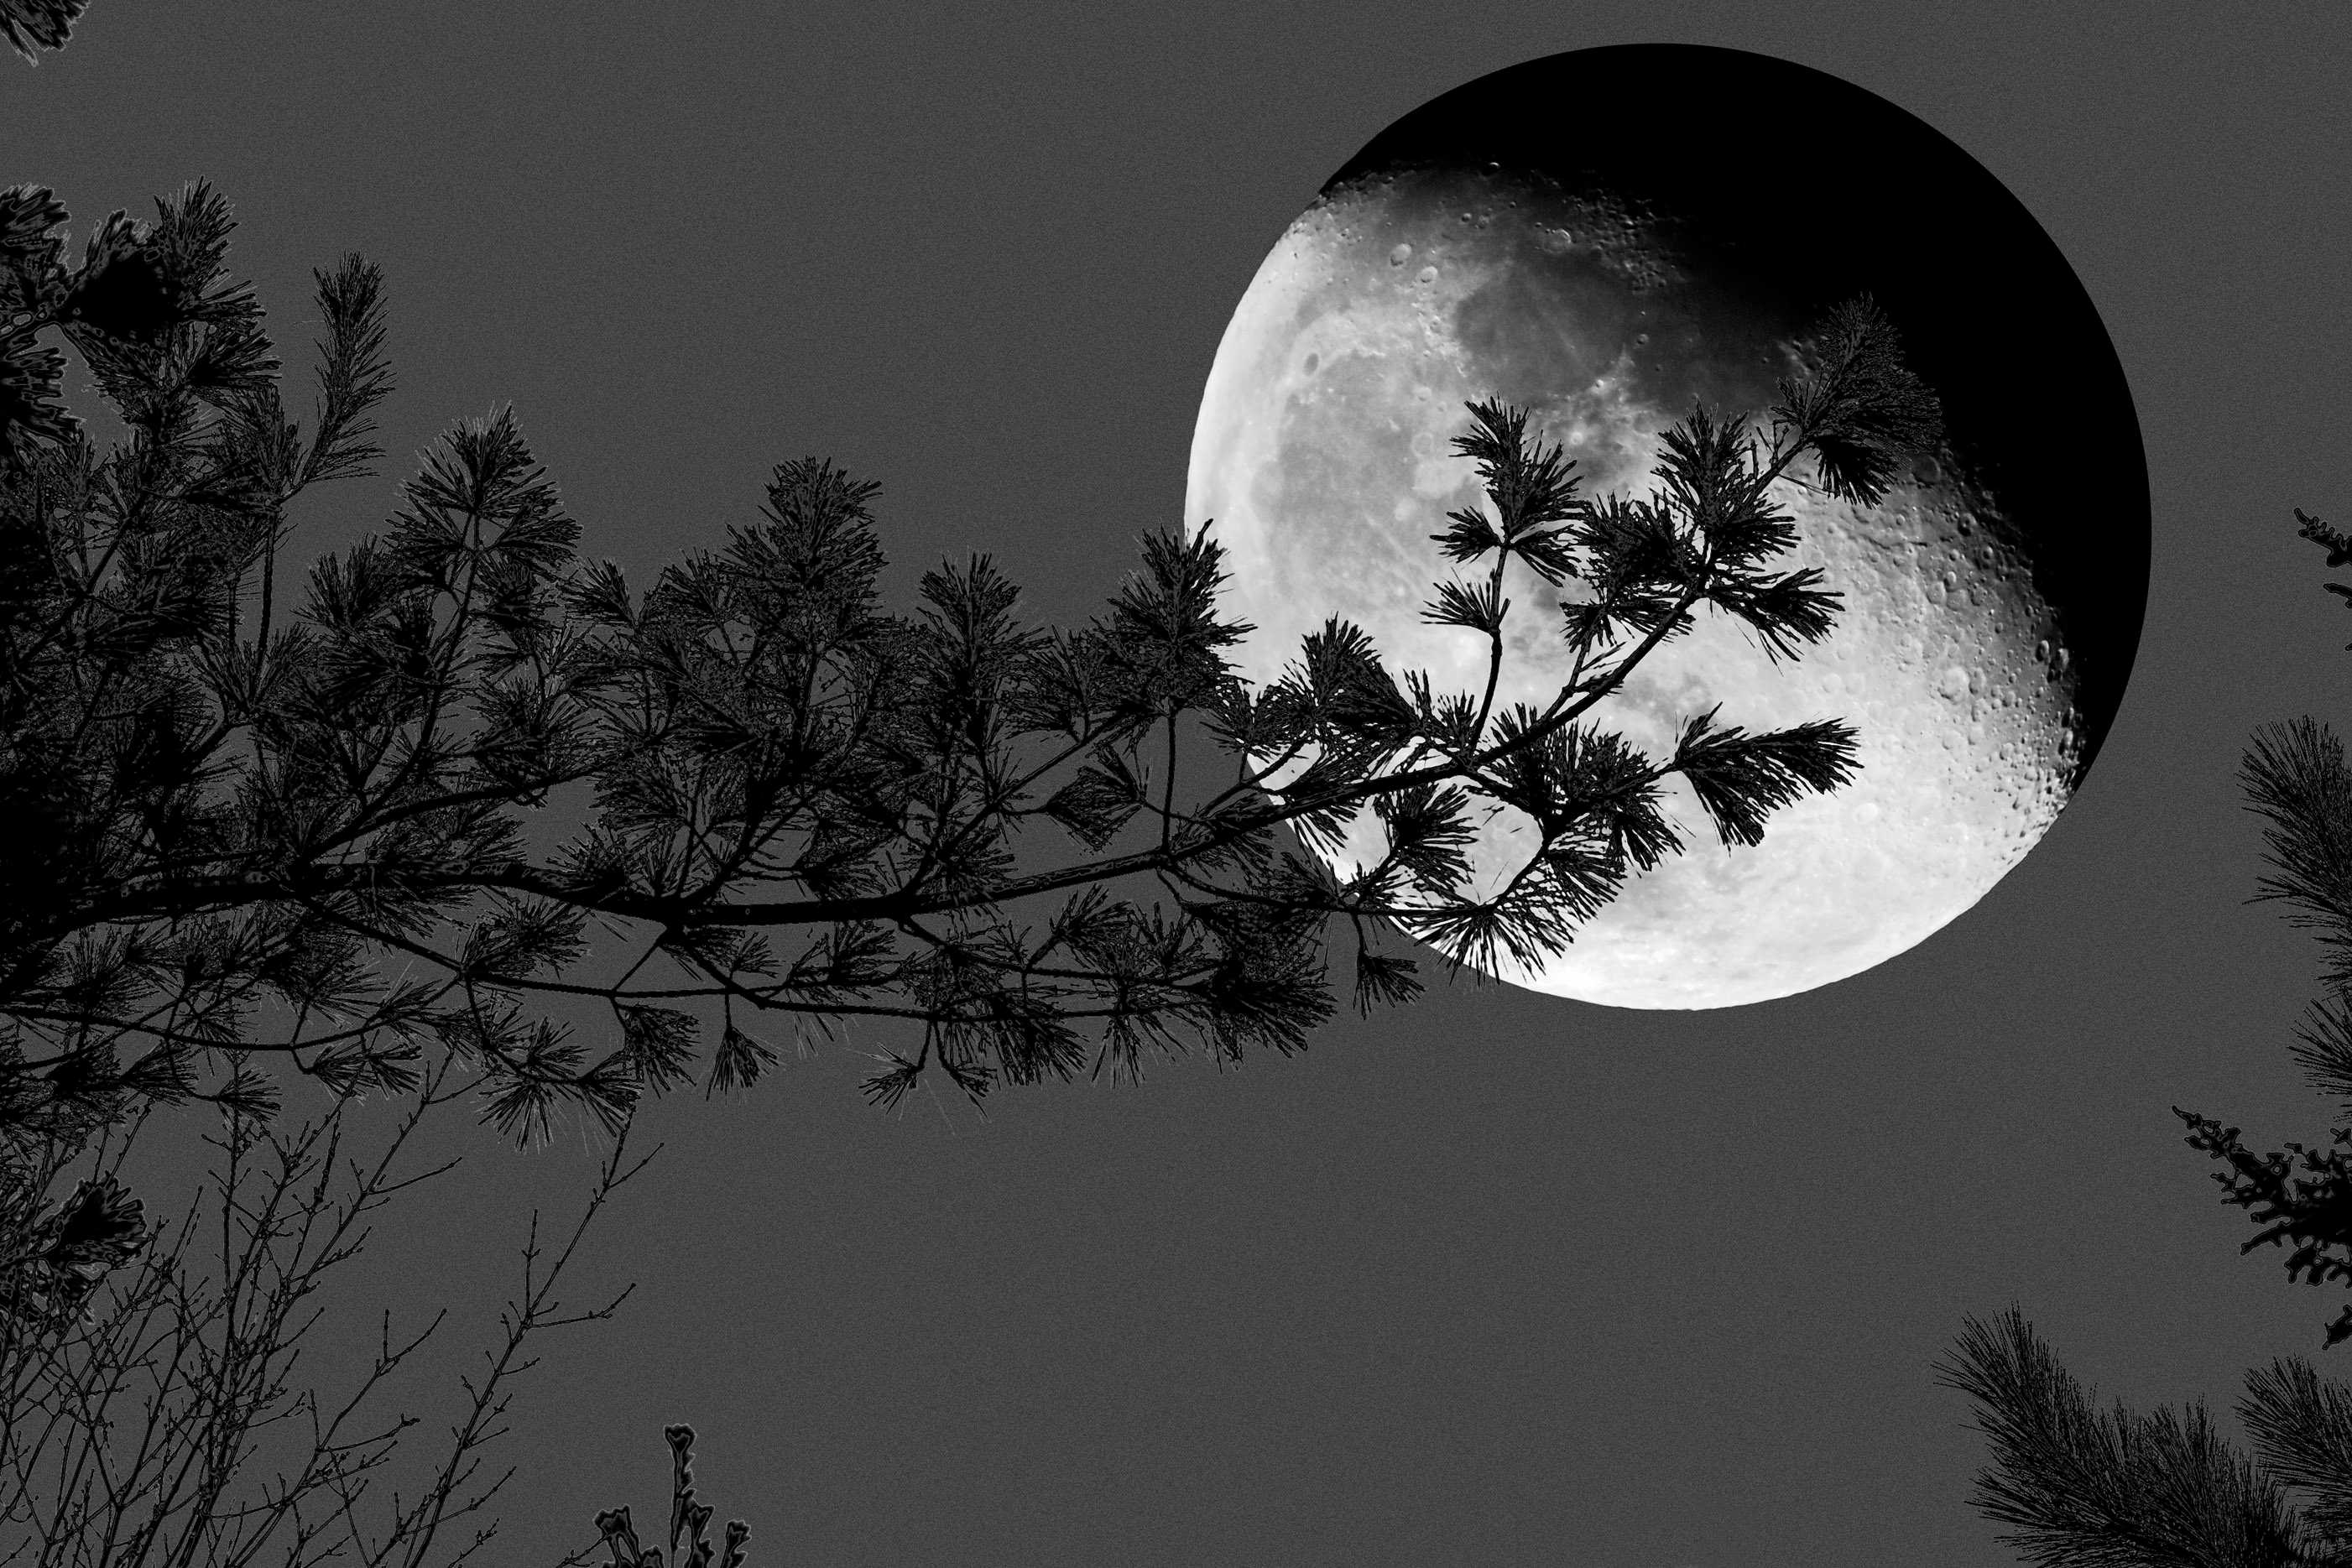

In [106]:
img = Image.open('moon.pgm')
img

In [107]:
img.format

'PPM'

In [108]:
img.size

(2803, 1869)

In [109]:
img.save('new_moon.png')

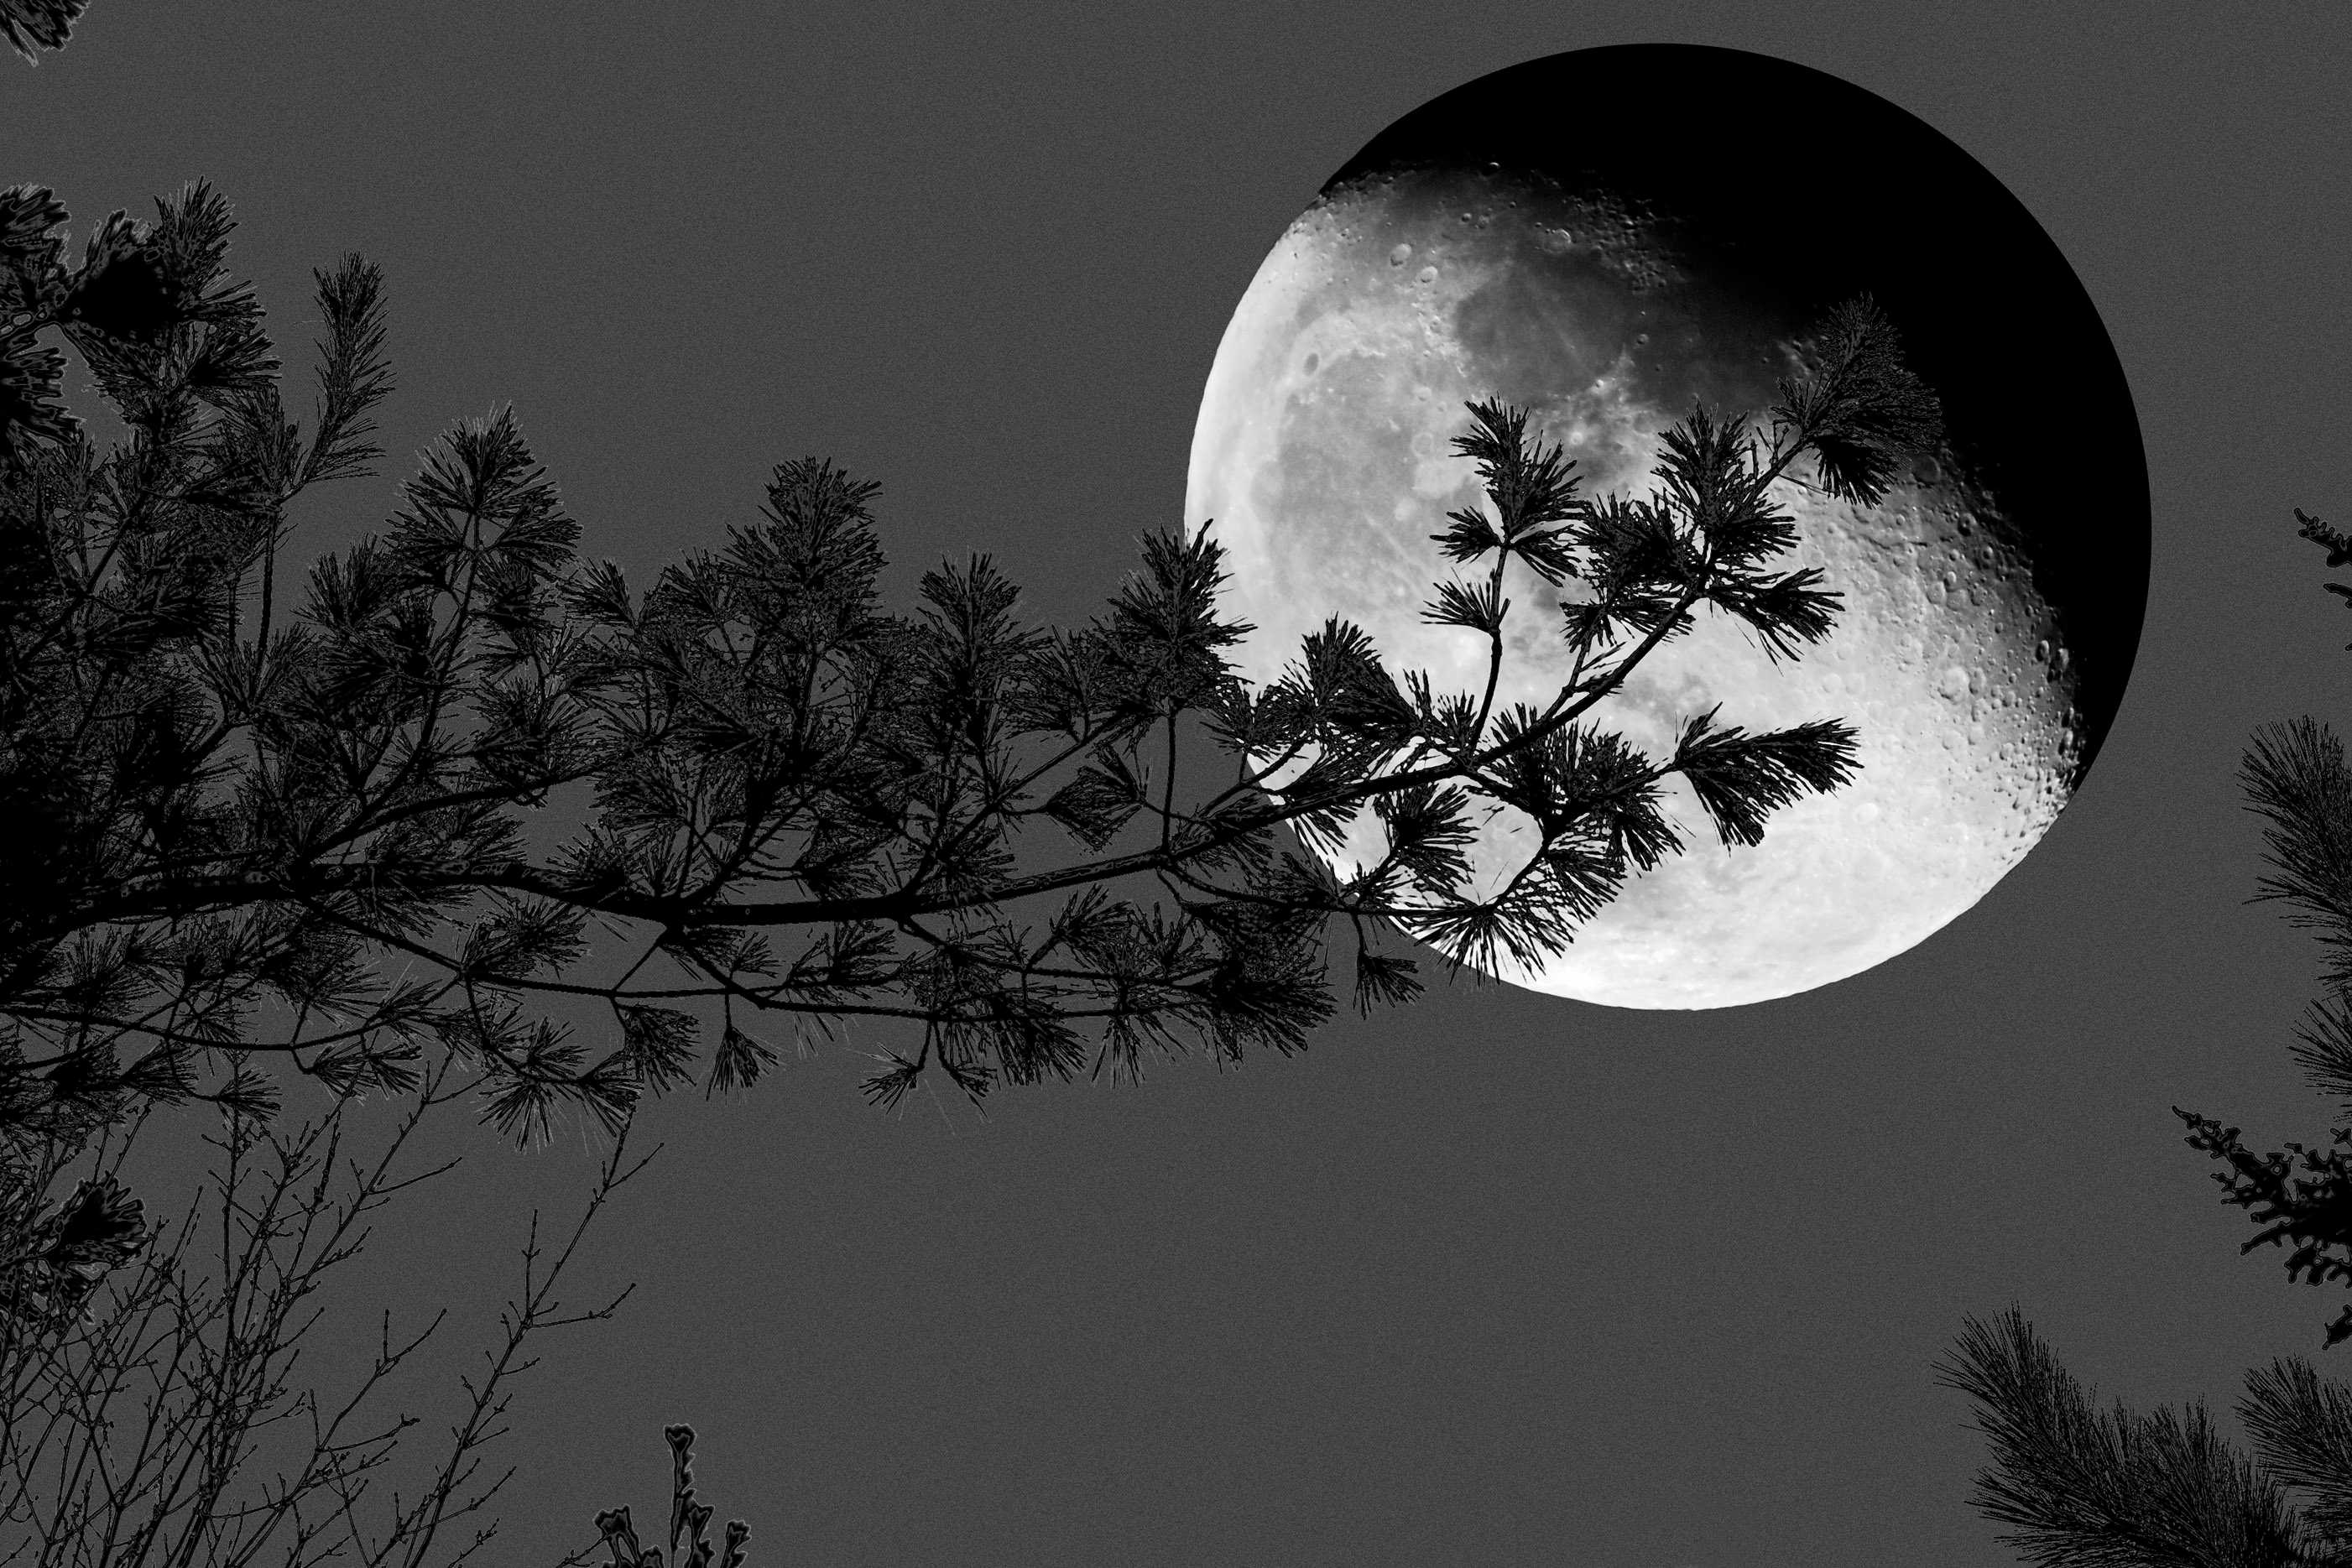

In [110]:
Image.open('new_moon.png')

In [112]:
imgArray = np.array(img)
imgArray

array([[ 31,  49,  72, ...,  80,  81,  68],
       [  0,   6,  50, ...,  76,  75,  70],
       [  0,   1,   3, ...,  64,  66,  70],
       ...,
       [  0,   5,  59, ...,   6,  31,  13],
       [  0,  65, 110, ...,   0,   0,   2],
       [ 34,  93,  67, ...,   0,   0,   2]], dtype=uint8)

In [134]:
with open('./digits_2K/files.txt') as files:
    lines = files.readlines()

In [143]:
files = []
labels = []

for line in range(len(lines)):
    files.append(lines[line].split()[0])
    labels.append(lines[line].split()[1])

In [196]:
data_dict = {'image': [], 'label': []}

for i in range(len(files)):
    img = Image.open('./digits_2K/'+files[i])
    img_array = np.array(img, dtype = 'int')
    img_array = img_array.reshape((1, img_array.shape[0] * img_array.shape[1]))
    data_dict['image'].append(img_array)
    data_dict['label'].append(int(labels[i]))

In [197]:
data_dict.keys()

dict_keys(['image', 'label'])

In [198]:
data_dict['image'][:1]

[array([[1, 1, 1, ..., 1, 1, 1]])]

In [199]:
data_dict['label'][:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [200]:
data_dict['label'][-10:]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [202]:
(data_dict.keys())

dict_keys

In [205]:
with open('test.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames = list(data_dict.keys()))
    writer.writeheader()
    data = [dict(zip(list(data_dict.keys()), [k, v])) for k, v in data_dict.items()]
    writer.writerows(data)

In [ ]:
arr =np.array([1,2,3,4,5,6])
ts = arr.tostring()
print np.fromstring(ts,dtype=int)

In [228]:
with open('my_csv.csv', 'w') as file:
    file.write(list(data_dict.keys())[0])
    file.write(',')
    file.write(list(data_dict.keys())[1])
    file.write('\n')
    for line in range(len(data_dict['label'])):
        file.write(str(data_dict['image'][line]))
        file.write(',')
        file.write(str(data_dict['label'][line]))
        file.write('\n')

In [229]:
!cat my_csv.csv

image,label
[[1 1 1 ... 1 1 1]],0
[[1 1 1 ... 1 1 1]],0
[[1 1 1 ... 1 1 1]],0
[[1 1 1 ... 1 1 1]],0
[[1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
  0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
  0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
  1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
  1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
  1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
  0 0 0 0 0 